# Computer-Aided Musicology
## Mixolydian Modal Pentatonic Scale: Intervals
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


# Import Packages

In [1]:
#Imports 
from music21 import *
from IPython.display import Image


# Auxiliary Function to Display Musical Score using Lilypond in myBinder.org
def get_score_png():
    filename = ! ls *.png -Art | tail -n 1
    return(filename[0])

## Music21 Scales

In [2]:
sc = scale.MixolydianScale(pitch.Pitch('A2'))
print("Mixolydian of A    ",[str(p) for p in sc.pitches])
sc1 = scale.MajorScale(pitch.Pitch('A2'))
print("Major / Ionian of A",[str(p) for p in sc1.pitches])

Mixolydian of A     ['A2', 'B2', 'C#3', 'D3', 'E3', 'F#3', 'G3', 'A3']
Major / Ionian of A ['A2', 'B2', 'C#3', 'D3', 'E3', 'F#3', 'G#3', 'A3']


In [3]:
list_of_notes=[note.Note(p) for p in sc.pitches]
list_of_intervals=[interval.notesToInterval(list_of_notes[0],n) for n in list_of_notes][:-1]
print([t.name for t in list_of_intervals])

['P1', 'M2', 'M3', 'P4', 'P5', 'M6', 'm7']


## General Function that Returns a Scale from a Given Interval

In [4]:
## General Function that Returns a Scale from Given Intervals
def intervals_to_scale(tonic, intervals, octaves):
    scale_list=[]
    for x in range(octaves):
        note_tonic=interval.Interval(0+12*x).transposeNote(note.Note(tonic))
        for interval_symbol in intervals:
            scale_list.append(interval.Interval(interval_symbol).transposeNote(note_tonic))
    return scale_list

## Lists of intervals of the Pentatonic Scales

In [5]:
# Pentatonic Scales
list_MajorPentatonic_intervals=['p1','M2', 'M3', 'p5', 'M6']
list_MinorPentatonic_intervals=['p1','m3', 'p4', 'p5', 'm7']

#Mixolidian Modal Pentatonic Scales
MixolydianPentatonic_intervals=['p1', 'M3', 'p4', 'p5', 'm7']


In [6]:
MixolydianPentatonic=intervals_to_scale('A2', MixolydianPentatonic_intervals, 3)

# Display the Mixolydian Pentatonic Scale as a Musical Score

In [7]:
s1 = stream.Stream()
s1.insert(0, clef.TrebleClef())
s1.insert(0, metadata.Metadata())
s1.metadata.title = " Mixolydian Pentatonic of %s" % MixolydianPentatonic[0].name
s1.metadata.composer = "Guitars.AI"
s1.append(meter.TimeSignature('2/4'))
s1.append(note.Rest('half'))
s1.append(MixolydianPentatonic)

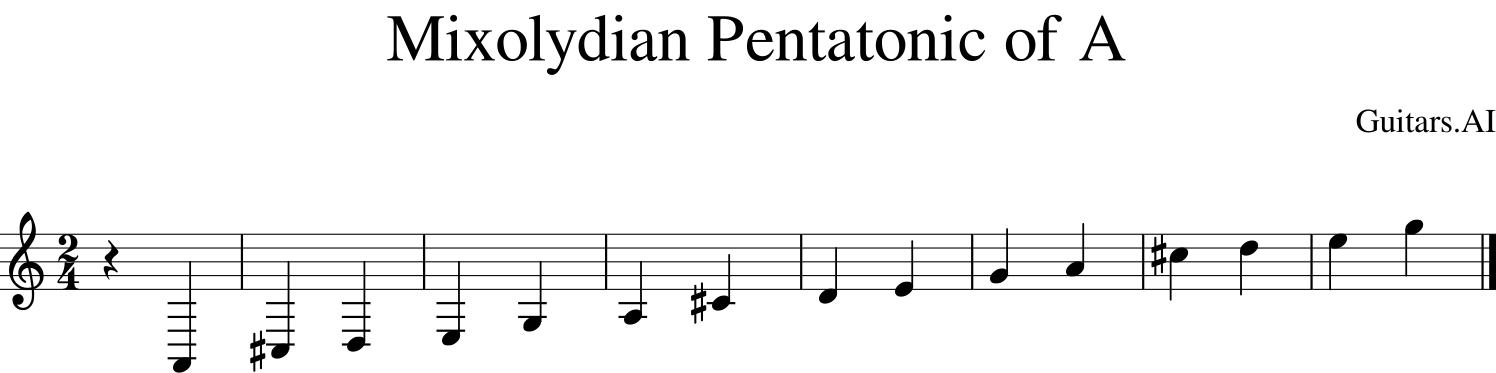

In [8]:
s1.show() # Local machine , if Musescore is installed
#s1.show('lily.png')
#Image(filename=get_score_png(), height=100) 

In [9]:
s1.show('midi')